In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk

In [3]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zachariamwaura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zachariamwaura/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df = pd.read_csv('CLEANDATA/Clean_MT.csv', index_col=False)
df.head(10)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
5,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
6,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma..."
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
8,Suction-assisted lipectomy - lipodystrophy of...,Bariatrics,Lipectomy - Abdomen/Thighs,"PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the...","bariatrics, lipodystrophy, abd pads, suction-a..."
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."


In [6]:
Sampletext = df['transcription'].iloc[2]

In [7]:
# Preprocessing

def PreProcess(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Lowercasing
    tokens = [w.lower() for w in tokens]
    # Remove punctuation
    words = [word for word in tokens if word.isalpha()]
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    #lammatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return words

In [8]:
PreProcess(Sampletext)

['history',
 'present',
 'illness',
 'seen',
 'abc',
 'today',
 'pleasant',
 'gentleman',
 'year',
 'old',
 'pound',
 'bmi',
 'overweight',
 'ten',
 'year',
 'since',
 'age',
 'highest',
 'pound',
 'lowest',
 'pursuing',
 'surgical',
 'attempt',
 'weight',
 'loss',
 'feel',
 'good',
 'get',
 'healthy',
 'begin',
 'exercise',
 'want',
 'able',
 'exercise',
 'play',
 'volleyball',
 'physically',
 'sluggish',
 'get',
 'tired',
 'quickly',
 'go',
 'often',
 'loses',
 'weight',
 'always',
 'regains',
 'gain',
 'back',
 'lost',
 'biggest',
 'weight',
 'loss',
 'pound',
 'three',
 'month',
 'gained',
 'back',
 'six',
 'month',
 'drinking',
 'alcohol',
 'taking',
 'many',
 'calorie',
 'multiple',
 'commercial',
 'weight',
 'loss',
 'program',
 'including',
 'slim',
 'fast',
 'one',
 'month',
 'one',
 'year',
 'ago',
 'atkin',
 'diet',
 'one',
 'month',
 'two',
 'year',
 'past',
 'medical',
 'history',
 'difficulty',
 'climbing',
 'stair',
 'difficulty',
 'airline',
 'seat',
 'tying',
 'shoe',


In [9]:
words = PreProcess(Sampletext)

In [10]:
# create word frequency
wordfreq = {}
for word in words:
    if word not in wordfreq:
        wordfreq[word] = 0 
    wordfreq[word] += 1

In [11]:
print(wordfreq)

{'history': 7, 'present': 1, 'illness': 1, 'seen': 1, 'abc': 1, 'today': 1, 'pleasant': 1, 'gentleman': 1, 'year': 6, 'old': 1, 'pound': 7, 'bmi': 1, 'overweight': 2, 'ten': 3, 'since': 1, 'age': 1, 'highest': 1, 'lowest': 1, 'pursuing': 1, 'surgical': 2, 'attempt': 1, 'weight': 6, 'loss': 3, 'feel': 1, 'good': 1, 'get': 4, 'healthy': 1, 'begin': 1, 'exercise': 2, 'want': 2, 'able': 1, 'play': 1, 'volleyball': 1, 'physically': 1, 'sluggish': 1, 'tired': 1, 'quickly': 1, 'go': 2, 'often': 1, 'loses': 1, 'always': 1, 'regains': 1, 'gain': 1, 'back': 3, 'lost': 2, 'biggest': 1, 'three': 1, 'month': 4, 'gained': 1, 'six': 1, 'drinking': 1, 'alcohol': 2, 'taking': 1, 'many': 1, 'calorie': 1, 'multiple': 1, 'commercial': 1, 'program': 1, 'including': 1, 'slim': 1, 'fast': 2, 'one': 4, 'ago': 2, 'atkin': 1, 'diet': 1, 'two': 4, 'past': 3, 'medical': 1, 'difficulty': 4, 'climbing': 1, 'stair': 1, 'airline': 1, 'seat': 1, 'tying': 1, 'shoe': 1, 'used': 2, 'public': 1, 'seating': 1, 'walking': 2

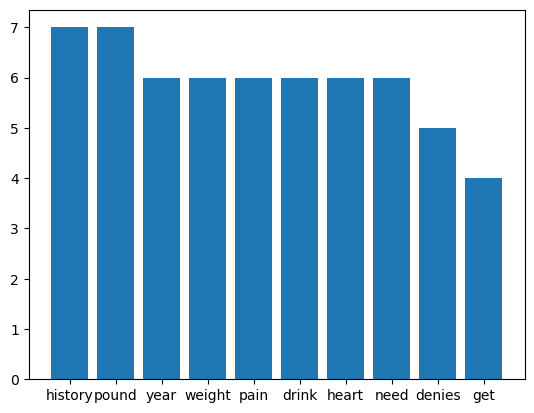

In [12]:
# plot word frequency top 10

wordfreq = sorted(wordfreq.items(), key=lambda x: x[1], reverse=True)
wordfreq = wordfreq[:10]

plt.bar([x[0] for x in wordfreq], [x[1] for x in wordfreq])
plt.show()

In [13]:
# Define the vectorizer
vectorizer = TfidfVectorizer()

In [14]:
# Preprocess the transcriptions
df['processed_transcription'] = df['transcription'].apply(PreProcess)

# Define the features and labels
X = df['processed_transcription'].apply(lambda x: ' '.join(x))
y = df['medical_specialty']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 3118
Testing set size: 780


In [15]:
# Fit the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix for training data: {X_train_tfidf.shape}")
print(f"TF-IDF matrix for testing data: {X_test_tfidf.shape}")

TF-IDF matrix for training data: (3118, 15188)
TF-IDF matrix for testing data: (780, 15188)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the classifier
classifier = LogisticRegression(max_iter=1000)

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.24615384615384617
Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         7
    Cardiovascular / Pulmonary       0.27      0.26      0.26        61
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.21      0.35      0.26        48
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         7
                     Dentistry       0.00      0.00      0.00         7
                   Dermatology       0.00      0.00      0.00         4
          Diets and Nutritions       0.00      0.00      0.00         3
             Discharge Summary       0.18      0.25      0.21        12
          ENT - Otolaryngology       0.00      0.00      0.00        18
        Emergency Room Reports       0.00      0.00      0.00         6
          

/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.naive_bayes import MultinomialNB

# Define the classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Classification Report:\n{report_nb}")

Naive Bayes Accuracy: 0.3333333333333333
Naive Bayes Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         7
    Cardiovascular / Pulmonary       0.50      0.13      0.21        61
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.21      0.46      0.29        48
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         7
                     Dentistry       0.00      0.00      0.00         7
                   Dermatology       0.00      0.00      0.00         4
          Diets and Nutritions       0.00      0.00      0.00         3
             Discharge Summary       0.00      0.00      0.00        12
          ENT - Otolaryngology       0.00      0.00      0.00        18
        Emergency Room Reports       0.00      0.00      0.

/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


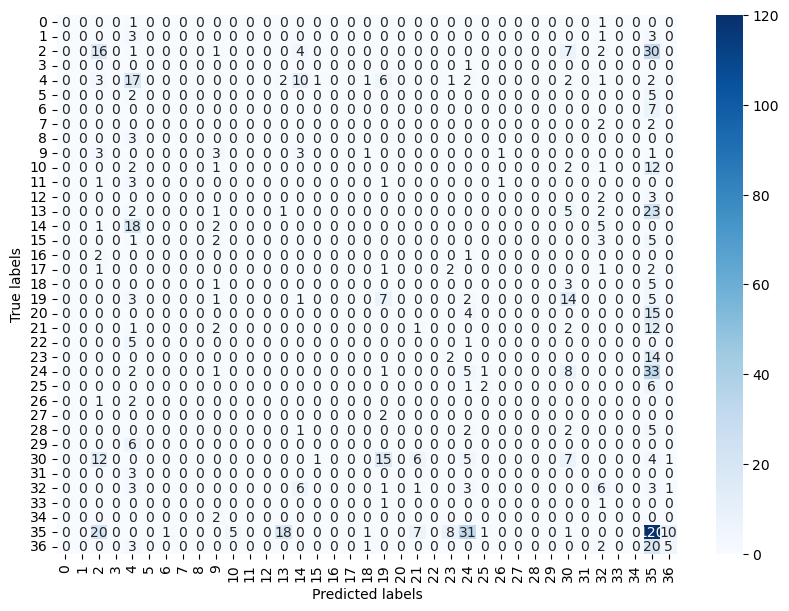

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [19]:
y.value_counts()

medical_specialty
 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
 ENT - Otolaryngology               84
 Neurosurgery                       81
 Ophthalmology                      79
 Discharge Summary                  77
 Nephrology                         63
 Hematology - Oncology              62
 Pain Management                    58
 Office Notes                       44
 Pediatrics - Neonatal              42
 Podiatry                           42
 Emergency Room Reports             31
 Dermatology                        25
 Dentistry                          25
 Cosmetic / Plastic Surgery         25
 Letter

In [20]:
df['medical_specialty'].value_counts()

medical_specialty
 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
 ENT - Otolaryngology               84
 Neurosurgery                       81
 Ophthalmology                      79
 Discharge Summary                  77
 Nephrology                         63
 Hematology - Oncology              62
 Pain Management                    58
 Office Notes                       44
 Pediatrics - Neonatal              42
 Podiatry                           42
 Emergency Room Reports             31
 Dermatology                        25
 Dentistry                          25
 Cosmetic / Plastic Surgery         25
 Letter

----------------------

In [21]:
# value counts of the medical specialty greater than 100
df['medical_specialty'].value_counts()[df['medical_specialty'].value_counts() > 100]

medical_specialty
 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
Name: count, dtype: int64

In [22]:
df = df[df['medical_specialty'].isin(df['medical_specialty'].value_counts()[df['medical_specialty'].value_counts() > 100].index)]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 3 to 3887
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   description              3010 non-null   object
 1   medical_specialty        3010 non-null   object
 2   sample_name              3010 non-null   object
 3   transcription            3010 non-null   object
 4   keywords                 3010 non-null   object
 5   processed_transcription  3010 non-null   object
dtypes: object(6)
memory usage: 164.6+ KB


In [24]:
df['medical_specialty'].value_counts()

medical_specialty
 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
Name: count, dtype: int64

In [25]:
# Preprocess the transcriptions
df['processed_transcription'] = df['transcription'].apply(PreProcess)

# Define the features and labels
X = df['processed_transcription'].apply(lambda x: ' '.join(x))
y = df['medical_specialty']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 2408
Testing set size: 602


In [26]:
# Fit the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix for training data: {X_train_tfidf.shape}")
print(f"TF-IDF matrix for testing data: {X_test_tfidf.shape}")

TF-IDF matrix for training data: (2408, 14550)
TF-IDF matrix for testing data: (602, 14550)


In [27]:
# Define the classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Classification Report:\n{report_nb}")

Naive Bayes Accuracy: 0.4219269102990033
Naive Bayes Classification Report:
                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.53      0.16      0.24        63
    Consult - History and Phy.       0.28      0.58      0.38        38
              Gastroenterology       0.00      0.00      0.00        42
              General Medicine       0.00      0.00      0.00        33
                     Neurology       0.11      0.03      0.05        35
       Obstetrics / Gynecology       0.00      0.00      0.00        22
                    Orthopedic       0.29      0.04      0.07        52
                     Radiology       0.17      0.08      0.11        38
 SOAP / Chart / Progress Notes       0.00      0.00      0.00        32
                       Surgery       0.46      1.00      0.63       216
                       Urology       0.00      0.00      0.00        31

                      accuracy                           0

/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/capstoneEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Define the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print(f"Original training set size: {X_train_tfidf.shape}")
print(f"Resampled training set size: {X_train_resampled.shape}")

Original training set size: (2408, 14550)
Resampled training set size: (8855, 14550)


In [29]:
# Define the classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Classification Report:\n{report_nb}")

Naive Bayes Accuracy: 0.42857142857142855
Naive Bayes Classification Report:
                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.47      0.54      0.50        63
    Consult - History and Phy.       0.32      0.42      0.36        38
              Gastroenterology       0.44      0.64      0.52        42
              General Medicine       0.24      0.30      0.27        33
                     Neurology       0.50      0.46      0.48        35
       Obstetrics / Gynecology       0.33      0.68      0.45        22
                    Orthopedic       0.40      0.77      0.53        52
                     Radiology       0.26      0.24      0.25        38
 SOAP / Chart / Progress Notes       0.26      0.28      0.27        32
                       Surgery       0.77      0.28      0.41       216
                       Urology       0.43      0.71      0.54        31

                      accuracy                           

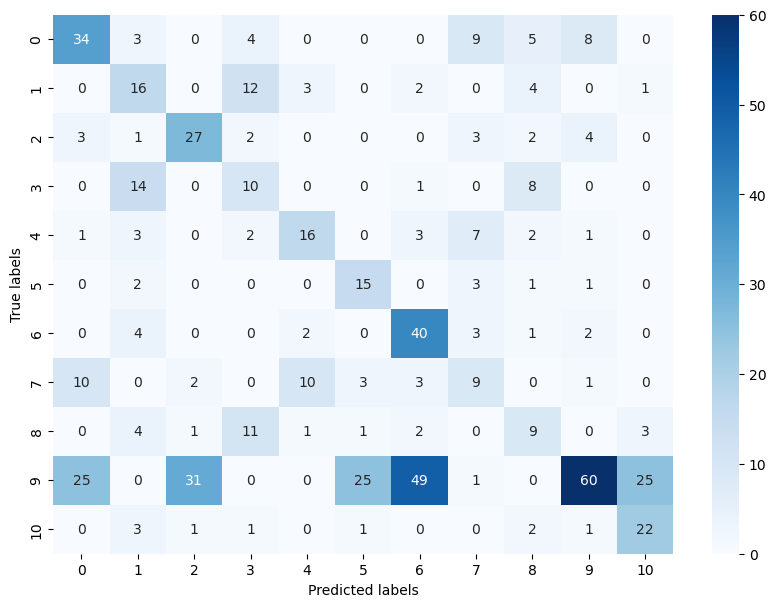

In [30]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()